In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from radar import radar2, norm_df, radar
import pandas as pd

In [2]:
data = pd.read_hdf('combined_maf_dataframe.hdf')

In [3]:
data.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'SNIa_PrePeak_Mean', 'Fast Microlensing_Mean', 'Slow Microlensing_Mean',
       'KN_PrePeak_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
       'TDEsPopMetric__some_color_Mean', 'TDEsPopMetric__some_color_pu_Mean',
       'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median',
       'Nstars_no_crowding_Total N Stars, no crowding',
       'ExgalM5_with_cuts_3x2ptFoM', 'DD:ELAISS1,u', 'DD:XMM-LSS,u',
       'DD:ECDFS,u', 'DD:COSMOS,u', 'DD:EDFS,u', 'DD:EDFSa,u', 'DD:EDFSb,u',
       'DD:ELAISS1,g', 'DD:XMM-LSS,g', 'DD:ECDFS,g', 'DD:COSMOS,g',
       'DD:EDFS,g', 'DD:EDFSa,g', 'DD:EDFSb,g', 'DD:ELAISS1,r', 'DD:XMM-LSS,r',
       'DD:ECDFS,r', 'DD:COSMOS,r', 'DD:EDFS,r', 'DD:EDFSa,r', 'DD:EDFSb,r',
       'DD:ELAISS1,i', 'DD:XMM-LSS,i', 'D

In [4]:
cols = ['runName', 'parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis',
        'SNIa_PrePeak_Mean',
        'TDEsPopMetric__some_color_pu_Mean',
        'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median',
        'ExgalM5_with_cuts_3x2ptFoM',
        'Fast Microlensing_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
        'Nstars_no_crowding_Total N Stars, no crowding']#,
#        '3 pairs in 15 nights detection loss NEO H=16.0',
#        '3 pairs in 30 nights detection loss NEO H=22.0',
#       '3 pairs in 15 nights detection loss TNO H=4.0']

linear_cols = []#['SNIa_PrePeak_Mean',
           #'TDEsPopMetric__some_color_pu_Mean',
           #'Fast Microlensing_Mean',
           #'3 pairs in 15 nights detection loss NEO H=16.0',
           #'3 pairs in 30 nights detection loss NEO H=22.0',
           #'3 pairs in 15 nights detection loss TNO H=4.0']

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNIa_PrePeak_Mean': 'SNeIa', 'Fast Microlensing_Mean': 'Fast Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
        'TDEsPopMetric__some_color_Mean': 'TDE',
               'TDEsPopMetric__some_color_pu_Mean':'TDE',
               'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median': 'WL',
               'ExgalM5_with_cuts_3x2ptFoM': '3x2FoM',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
        '3 pairs in 15 nights detection loss TNO H=4.0':' TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [5]:
data['runName']


0              baseline_nexp1
1     cadence_drive_gl100_gcb
2         cadence_drive_gl100
3     cadence_drive_gl200_gcb
4         cadence_drive_gl200
5      cadence_drive_gl30_gcb
6          cadence_drive_gl30
7             footprint_var_0
8            footprint_var_10
9            footprint_var_11
10            footprint_var_1
11            footprint_var_2
12            footprint_var_3
13            footprint_var_4
14            footprint_var_5
15            footprint_var_6
16            footprint_var_7
17            footprint_var_8
18            footprint_var_9
19     twi_pairs_mixed_repeat
20            twi_pairs_mixed
21           twi_pairs_repeat
22                  twi_pairs
Name: runName, dtype: object

In [6]:
runs = ['baseline_nexp1'] + [name for name in data['runName'].values if 'cadence' in name]
runs

['baseline_nexp1',
 'cadence_drive_gl100_gcb',
 'cadence_drive_gl100',
 'cadence_drive_gl200_gcb',
 'cadence_drive_gl200',
 'cadence_drive_gl30_gcb',
 'cadence_drive_gl30']

In [7]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='baseline_nexp1')
data_normed = data_normed.rename(columns=name_mapper)

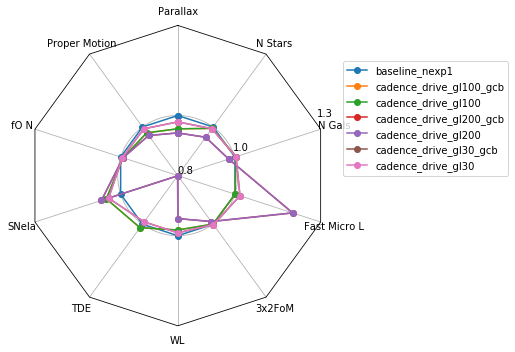

In [8]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.3])
fig.tight_layout()
#fig.savefig('radar_plots/even_filt_radar.pdf')

In [9]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars
0,baseline_nexp1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,cadence_drive_gl100_gcb,0.955805,0.975957,0.991684,1.050157,1.014218,0.981043,0.999483,1.000629,1.003535,0.994211
2,cadence_drive_gl100,0.955805,0.975957,0.991684,1.050157,1.014218,0.981043,0.999483,1.000629,1.003535,0.994211
3,cadence_drive_gl200_gcb,0.942022,0.965111,0.991684,1.067398,0.800948,0.943128,0.988956,1.201887,0.978194,0.957776
4,cadence_drive_gl200,0.942022,0.965111,0.991684,1.067398,0.800948,0.943128,0.988956,1.201887,0.978194,0.957776
5,cadence_drive_gl30_gcb,0.978813,0.992604,0.993763,1.042320,0.990521,0.990521,1.001296,1.017610,1.003793,0.993009
6,cadence_drive_gl30,0.978813,0.992604,0.993763,1.042320,0.990521,0.990521,1.001296,1.017610,1.003793,0.993009


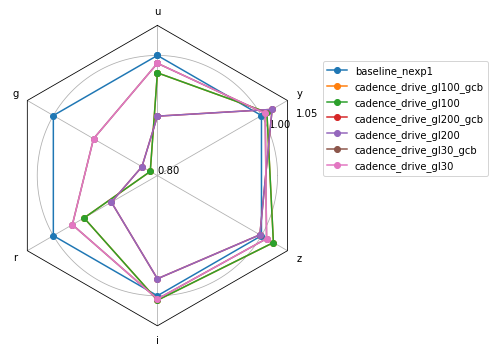

In [10]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp1',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.05], alpha=.1)
fig.tight_layout()

In [11]:
runs = ['baseline_nexp1'] + [name for name in data['runName'].values if 'footprint' in name] 

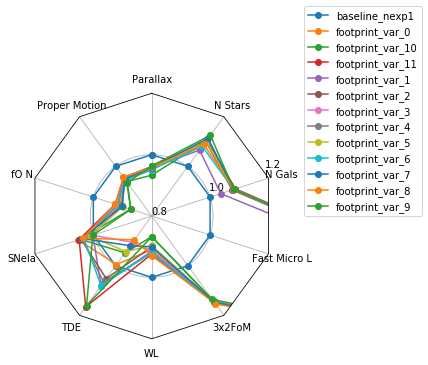

In [12]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp1')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.2])
fig.tight_layout()

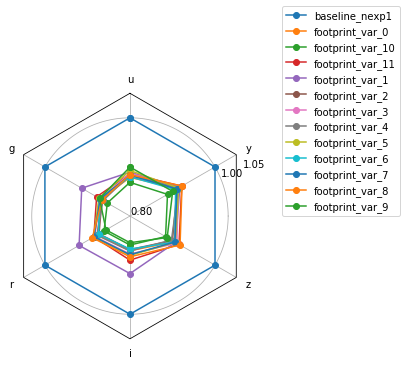

In [15]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp1',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.05], alpha=.1)
fig.tight_layout()

In [18]:
runs = ['baseline_nexp1'] + [name for name in data['runName'].values if 'twi' in name] 
runs

['baseline_nexp1',
 'twi_pairs_mixed_repeat',
 'twi_pairs_mixed',
 'twi_pairs_repeat',
 'twi_pairs']

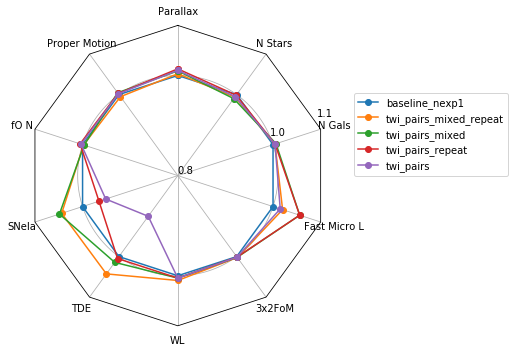

In [19]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp1')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.1])
fig.tight_layout()

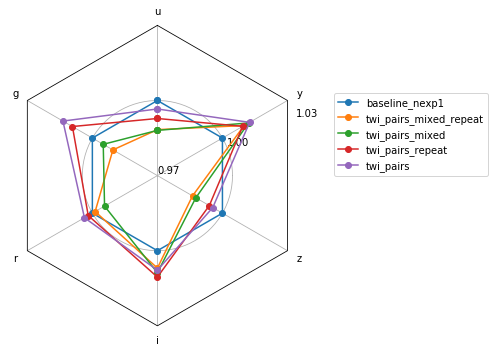

In [20]:

data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp1',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.97, 1.0, 1.03])
fig.tight_layout()
#fig.savefig('radar_plots/var_exp_mags_radar.pdf')